In [14]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
%matplotlib inline

from IPython.display import Image

In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
k_eyeballed = 4.62e-07

In [6]:
# changing frequency guesses

k_first= np.round(k_eyeballed*0.05,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

print(f_guess*1,numb_freq,k_first,increment) # wave
print(f_guess*2) # none
print(f_guess*1.5) # wave
print(f_guess*1.8) # none
print(f_guess*1.7) # none - cancelled
print(f_guess*1.6) # none
print(f_guess*1.52) # wave

3.3e-06 200 2.31e-08 1.73e-08
6.6e-06
4.95e-06
5.940000000000001e-06
5.6100000000000005e-06
5.28e-06
5.016e-06


In [7]:
# reducing the wavenumbers to find higher frequencies (i.e. lower modes)

k_first= np.round(k_eyeballed*0.005,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

print(f_guess*1.6,numb_freq,k_first,increment) # first without wave


5.28e-06 200 2.3e-09 1.7e-09


# Sets of $\omega$-$\kappa$

|label|frequency first guess|number of frequencies|first wavenumber|increments|filename|
|-----|--------|----|---------|---------|---------------|
|A|3.3e-06 |200 |2.31e-08 |1.73e-08 |dispc_33e06.dat|
|B|4.95e-06 |200 |2.31e-08 |1.73e-08 |dispc_495e06.dat|
|C|5.016e-06 |200 |2.31e-08 |1.73e-08 |dispc_502e06.dat|
|D|5.28e-06 |50 |2.3e-09 |1.7e-09|dispc_528e06.dat|
|E|0.008 |50 |1.15e-09 |8.62e-10|dispc_08e2.dat|

# Dispersion curves

In [8]:
def axis_properties(ax, xmin, xmax, ymin, ymax):
    ax.legend(fontsize=20, loc=2)
    ax.axhline(0,lw=2,c='k',zorder=1)
    ax.set_xlabel('wavenumber $\kappa$ (rad/cm)', fontsize=16)
    ax.set_ylabel('frequency $\omega$ (rad/sec)', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return

7.1472991e-05
6.8248029e-05
7.0291201e-05


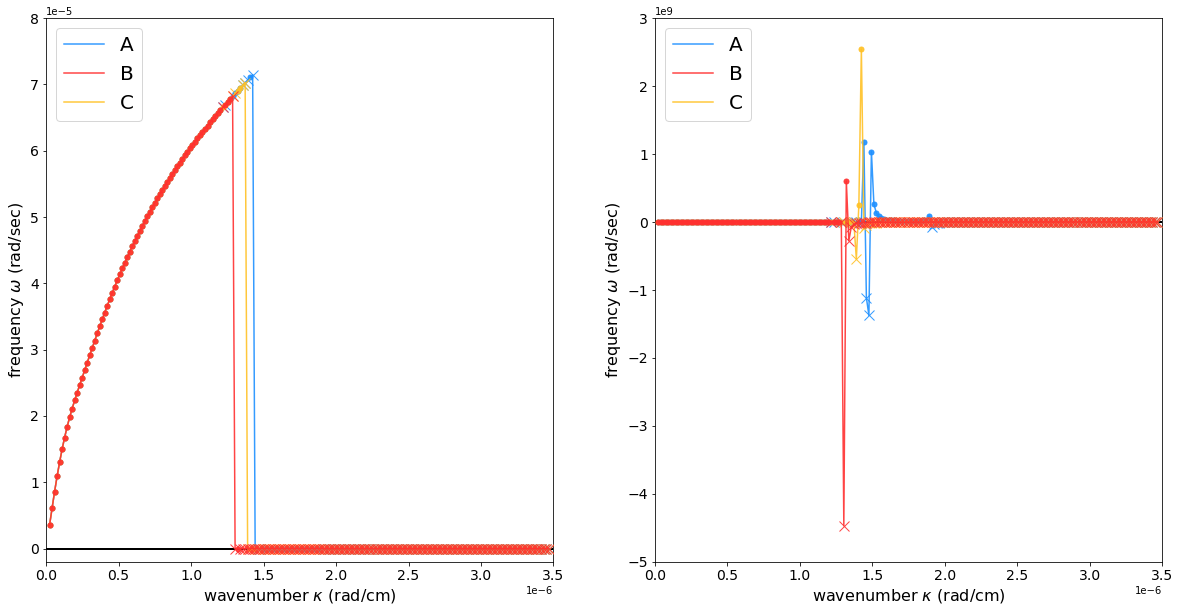

In [9]:
fnames = ['dispc_33e06.dat', 'dispc_495e06.dat', 'dispc_502e06.dat']
colours = ['#1E90FF', '#FF3030', '#FFC125']
zorders = [2, 4, 3]
labels = ['A', 'B', 'C']

fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 10))

for fname, c, zo, lab, n in zip(fnames, colours, zorders, labels, np.arange(len(fnames))):
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    print(frequency.max())
    for i in range(len(wavenumber)):
        if other_frequency[i]<0:
            mk='x'
        else:
            mk='.'
        ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, zorder=zo, label=lab)
axis_properties(ax, 0, 3.5e-06, -0.2e-5, 8e-5)
axis_properties(axi, 0, 3.5e-06, -5e09, 3e09)

0.0078516995
run this  1.08e-08 9.4287782e-05
0.087334703


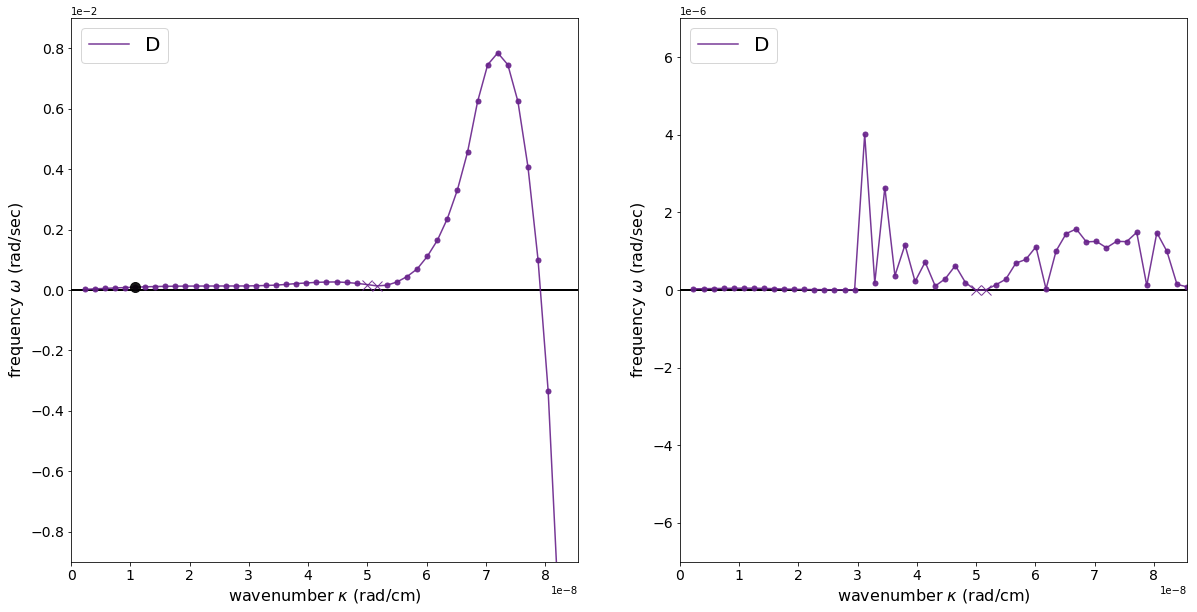

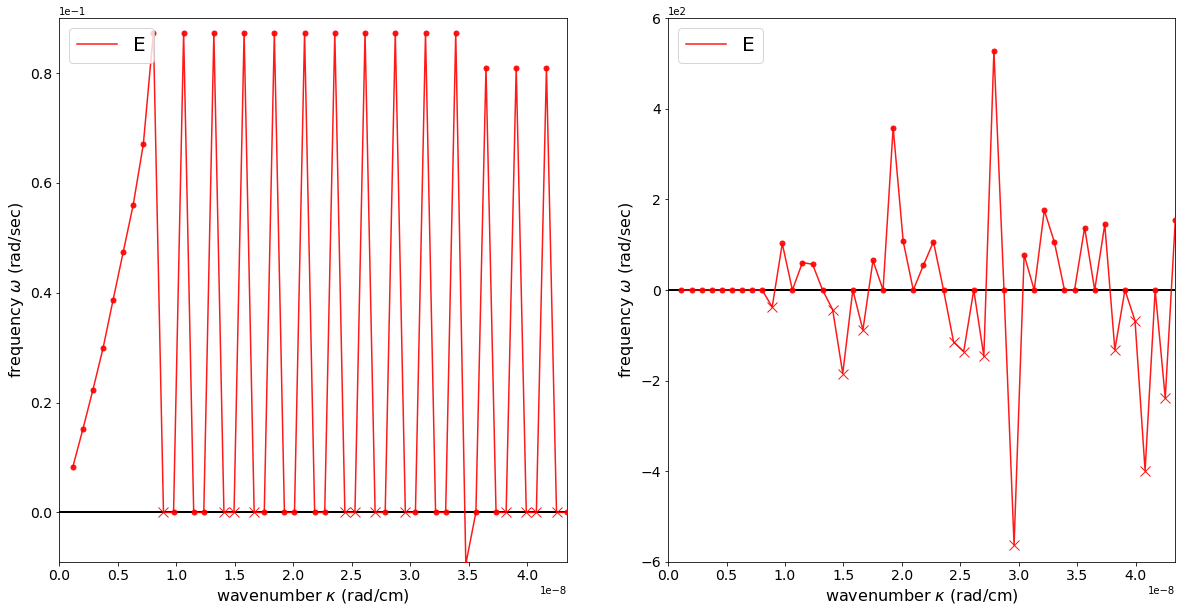

In [10]:
fnames=['dispc_528e06.dat', 'dispc_08e2.dat']
zorders=[2,3]
labels=['D','E']
colours=['#68228B','r']
ymaxs = [9e-3,9e-2]
ymaxsi = [7e-6,600]

for fname, c, zo, lab, ymax, ymaxi, n in zip(fnames, colours, zorders, labels, ymaxs, ymaxsi, np.arange(len(fnames))):
    fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 10))
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    print(frequency.max())
    for i in range(len(wavenumber)):
        if other_frequency[i]<0:
            mk='x'
        else:
            mk='.'
        ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axis_properties(ax, 0, wavenumber.max(), -0.9e-2, ymax)
    axis_properties(axi, 0, wavenumber.max(), -ymaxi, ymaxi)
    
    if fname=='dispc_528e06.dat':
        ind=5
        ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        print('run this ', wavenumber[ind], frequency[ind])

# Snapshots of $\omega$-$\kappa$

In [15]:
import scipy.io as sio
test = sio.loadmat('/ocean/imachuca/CTW_Brink/output/figures.mat')
test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Oct 28 00:13:37 2018',
 '__version__': '1.0',
 '__globals__': [],
 'z': array([[-1300.        , -1238.0952381 , -1176.19047619, -1114.28571429,
         -1052.38095238,  -990.47619048,  -928.57142857,  -866.66666667,
          -804.76190476,  -742.85714286,  -680.95238095,  -619.04761905,
          -557.14285714,  -495.23809524,  -433.33333333,  -371.42857143,
          -309.52380952,  -247.61904762,  -185.71428571,  -123.80952381,
           -61.9047619 ,     0.        ]]),
 'xpl': array([[  0.        ,   2.28571429,   4.57142857,   6.85714286,
           9.14285714,  11.42857143,  13.71428571,  16.        ,
          18.28571429,  20.57142857,  22.85714286,  25.14285714,
          27.42857143,  29.71428571,  32.        ,  34.28571429,
          36.57142857,  38.85714286,  41.14285714,  43.42857143,
          45.71428571,  48.        ,  50.28571429,  52.57142857,
          54.85714286,  57.14285714,  59.42857143, 

In [16]:
u_plot = test['w_profile']
xpl=test['xpl'][0,:]
z=test['z'][0,:]
z.shape

(22,)

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


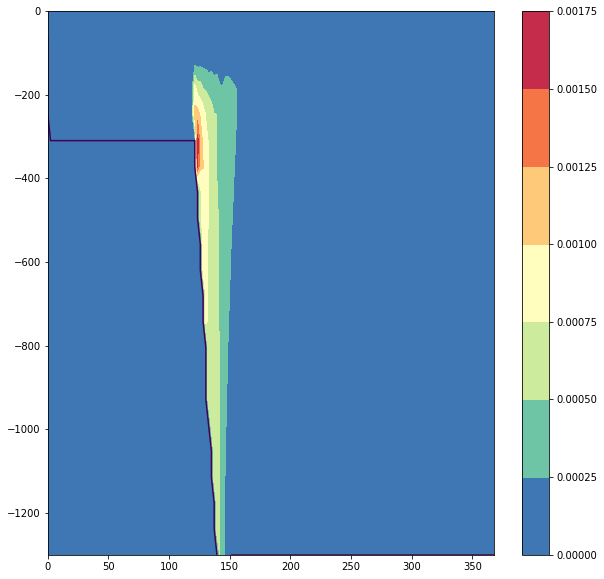

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
c = ax.contourf(xpl,z,u_plot, cmap=cm.Spectral_r)
ax.contour(xpl,z,u_plot, levels=[0])
fig.colorbar(c)